<a href="https://colab.research.google.com/github/theburak/PGP/blob/master/IDS_MaxVoting_Stacking_KDD99_v10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries

# For numerical computation on nd-arrays
import numpy as np

# For data analysis and manipulations with dataset
import pandas as pd
pd.set_option("display.max_columns", None)

# Data visualization library
import matplotlib.pyplot as plt

# Data visualization library built upon matplotlib
import seaborn as sns

#Datetime library for timing
from datetime import datetime

 
# To ignore warnings related to versions mismatch or updates
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Features - http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
            'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
            'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
            'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
            'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
            'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
            'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'intrusion_type']

In [3]:
url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
df = pd.read_csv(url, names = features, header = None)
# Dataset is now stored in a Pandas Dataframe

In [4]:
# Dataset -http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
#df = pd.read_csv('kddcup_veryshort.data_10_percent_corrected', names = features, header = None)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
print('Number of data points: ',df.shape[0])
print('Number of features: ', df.shape[1])

Number of data points:  494021
Number of features:  42


In [6]:
output_labels = df['intrusion_type'].unique()
print(f"There are {len(output_labels)} output labels and are: {output_labels}")

There are 23 output labels and are: ['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


In [7]:
# Data cleaning

In [8]:
# Checking for null values
for index, value in df.isnull().sum().iteritems():
    if value > 0:
        print(f"There are {value} missing values in column - {index}")

In [9]:
# There are no null values
# Checking for duplicate rows
print(f"Duplicate rows - {df.duplicated().sum()}")

Duplicate rows - 348435


In [10]:
# Removing duplicate rows
df.drop_duplicates(keep='first', inplace=True)
print(f"Duplicate rows - {df.duplicated().sum()}")

Duplicate rows - 0


In [11]:
# Saving the cleaned dataset
df.to_pickle('clean_dataset.pkl')

In [12]:
df = pd.read_pickle('clean_dataset.pkl')
df.shape

(145586, 42)

In [13]:
# Exploratory Data Analysis

In [14]:
# Distribution of classes in target label
dist = df['intrusion_type'].value_counts()
for name, count in dist.iteritems():
    print(f"Number of data points in class: {name.center(17)} is", end = ' ')
    print(f"{count} ({np.round(count / sum(dist) * 100, 3)}%)")

Number of data points in class:      normal.      is 87832 (60.33%)
Number of data points in class:      neptune.     is 51820 (35.594%)
Number of data points in class:       back.       is 968 (0.665%)
Number of data points in class:     teardrop.     is 918 (0.631%)
Number of data points in class:       satan.      is 906 (0.622%)
Number of data points in class:    warezclient.   is 893 (0.613%)
Number of data points in class:      ipsweep.     is 651 (0.447%)
Number of data points in class:       smurf.      is 641 (0.44%)
Number of data points in class:     portsweep.    is 416 (0.286%)
Number of data points in class:        pod.       is 206 (0.141%)
Number of data points in class:       nmap.       is 158 (0.109%)
Number of data points in class:   guess_passwd.   is 53 (0.036%)
Number of data points in class:  buffer_overflow. is 30 (0.021%)
Number of data points in class:    warezmaster.   is 20 (0.014%)
Number of data points in class:       land.       is 19 (0.013%)
Number of 

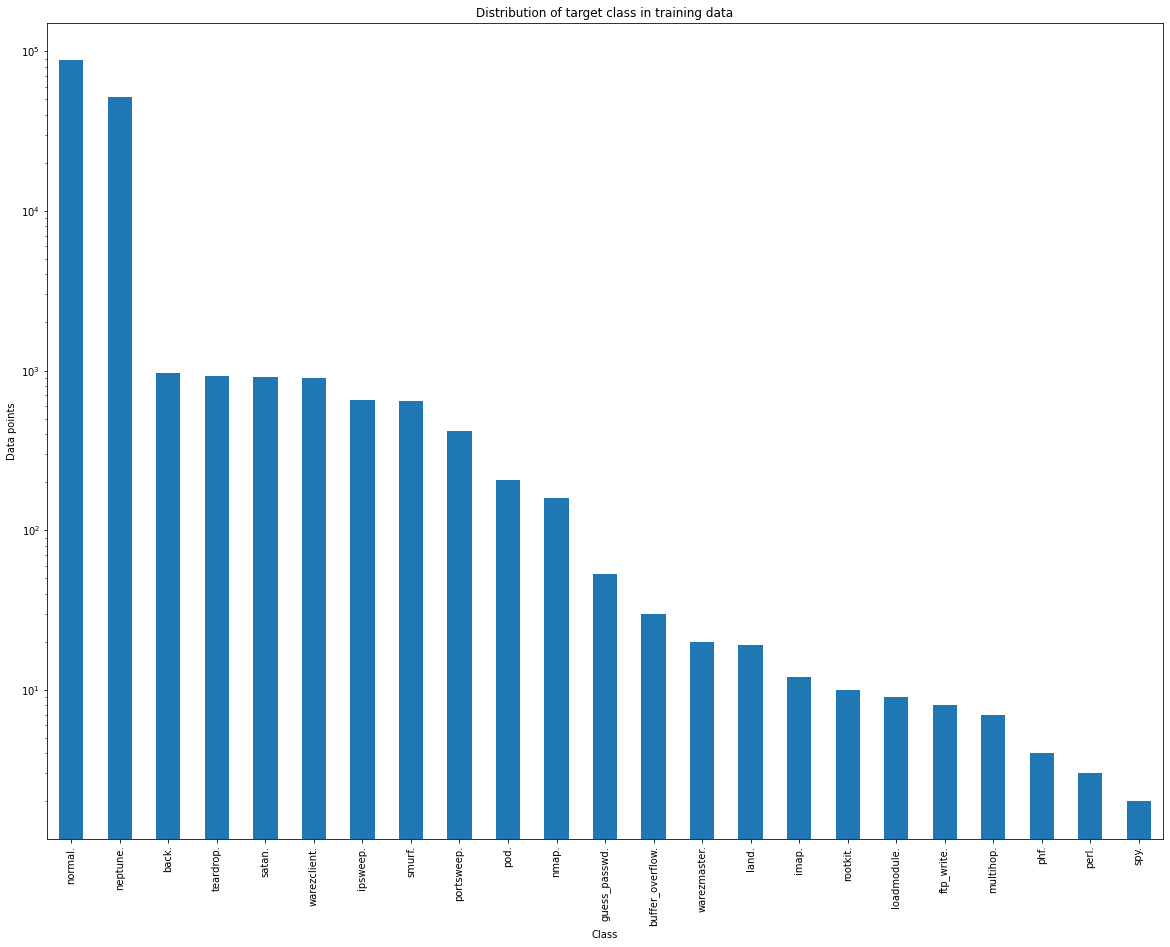

In [15]:
plt.figure(figsize=(20,15))
plt.yscale("log")
dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points')
plt.title('Distribution of target class in training data')
plt.show()

In [16]:
# Most of the data points are from "normal" (good connections) category which is around 60.33 %.

# In the categories that belong to bad connections, "neptune." (35.594 %) and "back." (0.665 %) have
# the highest no. of data points.

# Classes "rootkit.", "loadmodule.", "ftp_write.", "multihop.", "phf.", "perl.", "spy." have the least\
# no. of data points with less than 10 data points per class.

# The dataset is highly imbalanced, thus we will need to build a model which should be able to
# classify data points from these low distribution classes accurately.

# As the dataset is highly imbalanced, we will need to build a model which should be able to
# classify the INTRUSION categories accurately.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

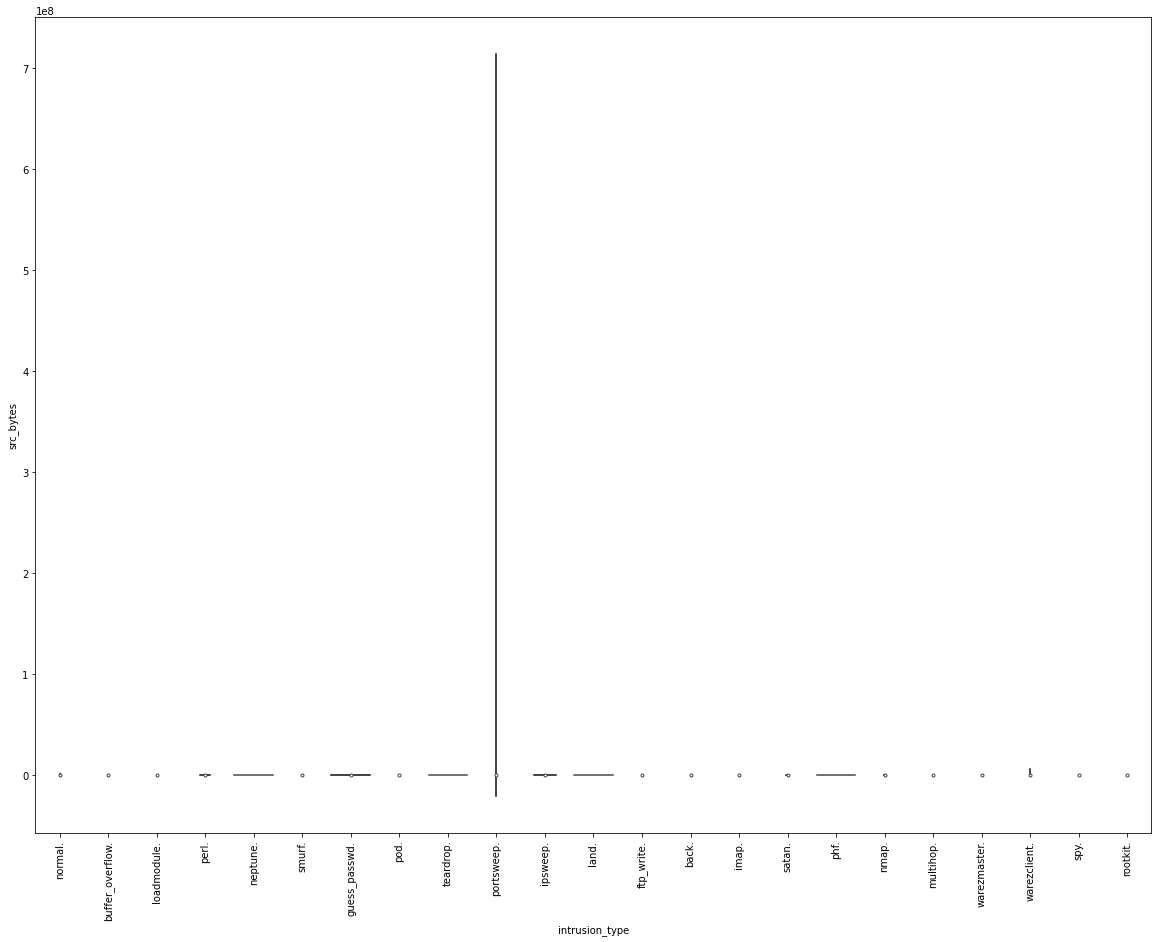

In [17]:
# Uni-variate analysis
plt.figure(figsize=(20,15))
sns.violinplot(x="intrusion_type", y="src_bytes", data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

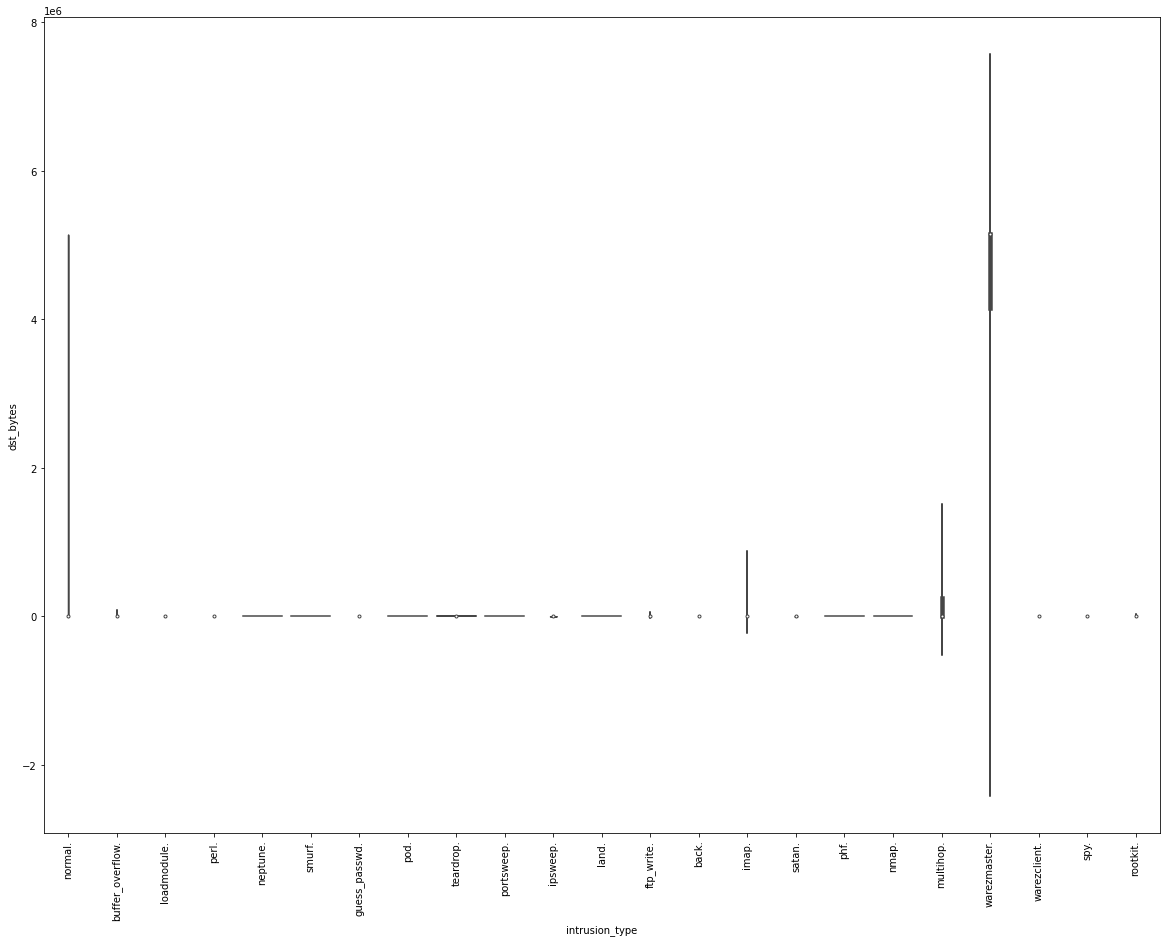

In [18]:
plt.figure(figsize=(20,15))
sns.violinplot(x="intrusion_type", y="dst_bytes", data=df)
plt.xticks(rotation=90)

In [19]:
# Using src_bytes as a feature for analysis, the intrusion category "portsweep" is distinguishable
# from rest of the categories

# Using dest_bytes as a feature for analysis, the intrusion categories "normal", "imap", "multihop"
# and "warezmaster" are distinguishable from rest of the categories.

# As we have relatively high no of classes, the Univariate analysis using boxplots and violin plots
# do not give us clear and satisfactory results

# Thus, we can go with pairplots for BiVariate Analysis or we can go with PCA/TSNE
# to reduce the no. of dimensions and perform Bi/Tri-Variate Analysis.

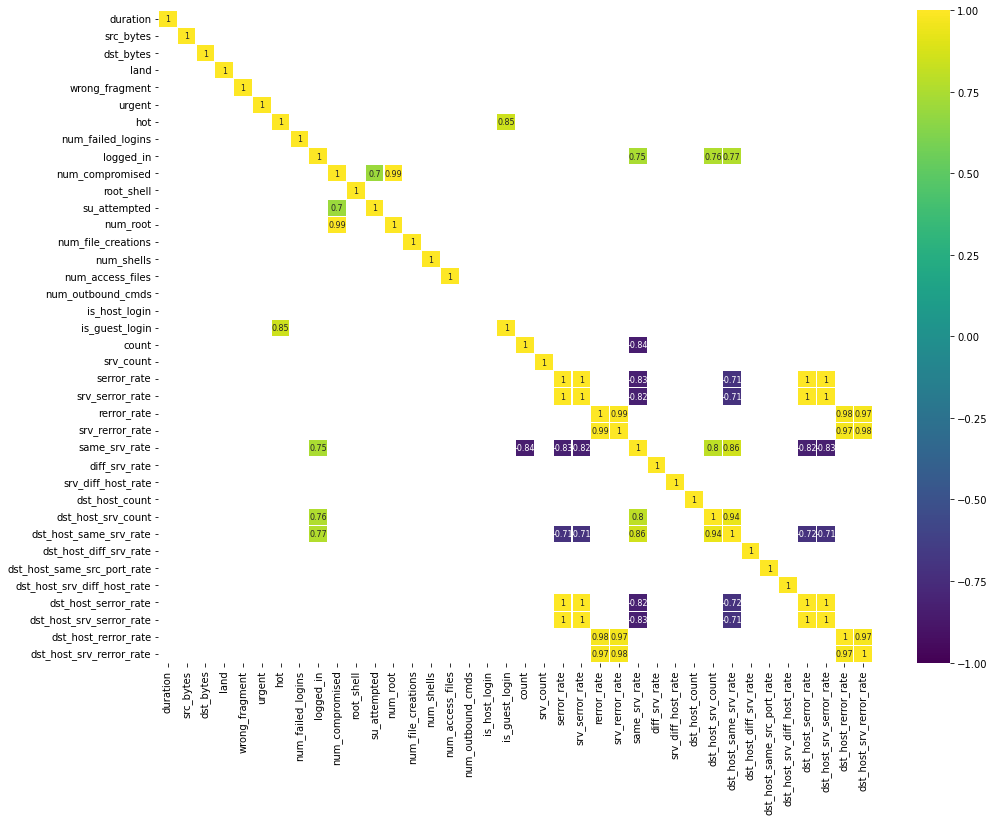

In [20]:
# Analysing feature to feature relationship

df_num = df.select_dtypes(include = ['float64', 'int64'])
corr = df_num.corr()
plt.figure(figsize=(16, 12))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8});

In [21]:
# Distribution of predictors/features
# A `histogram`_ is a representation of the distribution of data
# This function calls `matplotlib.pyplot.hist`, on each series in the DataFrame
# resulting in one histogram per column
##*df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [22]:
# Pair plots for bi-variate analyis
##*sns.pairplot(df, hue='intrusion_type', vars=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment'])

In [23]:
##*sns.pairplot(df, hue='intrusion_type', vars=['root_shell','su_attempted','num_root','num_file_creations'])

In [24]:
##*sns.pairplot(df, hue='intrusion_type', vars=['dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                                             #'dst_host_serror_rate','dst_host_srv_serror_rate'])

In [25]:
# Almost no linear seperabilty in any feature
# Trying PCA and t-sne

In [26]:
# t-sne -> Unsupervised non-linear dimensionality reduction and data visualization algorithm
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 50, n_iter = 1000)

In [27]:
# Preparing dataset for tsne
frames = list()
for label in df['intrusion_type'].unique():
    temp = df[df['intrusion_type'] == label]
    if label == 'normal.' or label == 'neptune.':     
        temp = temp.iloc[:10000, ]
    frames.append(temp)  
temp_df = pd.concat(frames)

# Since t-sne works on numeric attributes only
df_num = temp_df.select_dtypes(include = ['float64', 'int64'])
df_num.shape

(25934, 38)

In [28]:
tsne_df = tsne.fit_transform(df_num)
print(tsne_df.shape)

(25934, 2)


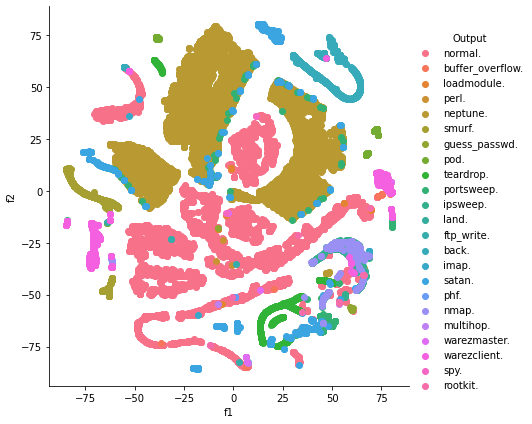

In [29]:
tsne_df = np.vstack((tsne_df.T, temp_df['intrusion_type'].values)).T
tsne_dataset = pd.DataFrame(data=tsne_df, columns=['f1', 'f2', 'Output'])
sns.FacetGrid(tsne_dataset, hue='Output', size=6).map(plt.scatter, 'f1', 'f2').add_legend()
plt.show()

In [30]:
# PCA -> Unsupervised linear dimensionality reduction and data visualization algorithm
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [31]:
# Standardizing the data for PCA
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df.select_dtypes(include = ['float64', 'int64']))

In [32]:
pca_df = pca.fit_transform(X)
pca_df.shape

(145586, 2)

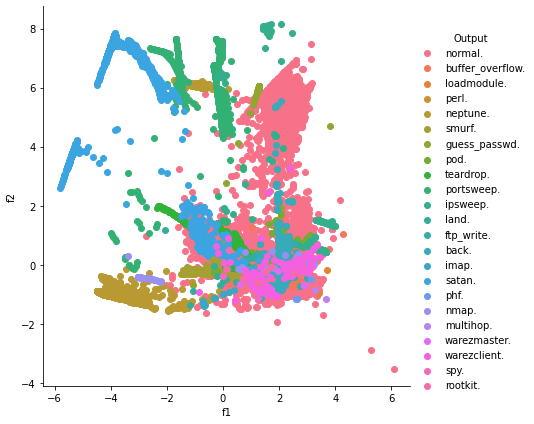

In [33]:
pca_df = np.vstack((pca_df.T, df['intrusion_type'].values)).T
pca_dataset = pd.DataFrame(data=pca_df, columns=['f1', 'f2', 'Output'])
sns.FacetGrid(pca_dataset, hue='Output', size=6).map(plt.scatter, 'f1', 'f2').add_legend()
plt.show()

In [34]:
# Understanding various discrete predictors in dataset

In [35]:
pd.crosstab(df.protocol_type, df.intrusion_type)

intrusion_type,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,nmap.,normal.,perl.,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
protocol_type,,,,,,,,,,,,,,,,,,,,,,,
icmp,0,0,0,0,0,560,0,0,0,0,103,892,0,0,206,1,0,3,641,0,0,0,0
tcp,968,30,8,53,12,91,19,9,7,51820,30,75789,3,4,0,415,7,733,0,2,0,893,20
udp,0,0,0,0,0,0,0,0,0,0,25,11151,0,0,0,0,3,170,0,0,918,0,0


In [36]:
pd.crosstab(df.root_shell, df.intrusion_type)

intrusion_type,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,nmap.,normal.,perl.,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
root_shell,,,,,,,,,,,,,,,,,,,,,,,
0,968,12,8,53,12,651,19,6,5,51820,158,87809,0,0,206,416,8,906,641,2,918,893,20
1,0,18,0,0,0,0,0,3,2,0,0,23,3,4,0,0,2,0,0,0,0,0,0


In [37]:
pd.crosstab(df.flag, df.intrusion_type)

intrusion_type,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,nmap.,normal.,perl.,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
flag,,,,,,,,,,,,,,,,,,,,,,,
OTH,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6,0,0,0,0,0,0,0
REJ,0,0,0,0,0,80,0,0,0,9349,0,4655,0,0,0,74,0,554,0,0,0,0,0
RSTO,0,1,0,45,0,3,0,0,0,446,0,66,0,0,0,7,0,0,0,0,0,1,0
RSTOS0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0
RSTR,90,0,0,4,0,0,0,0,0,0,0,31,0,0,0,299,0,0,0,0,0,1,0
S0,0,0,0,0,1,0,19,0,0,42025,0,51,0,0,0,18,0,164,0,0,0,0,0
S1,2,0,0,0,1,0,0,0,0,0,0,54,0,0,0,0,0,0,0,0,0,0,0
S2,5,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,1,0,0,0,1,0
S3,0,0,0,2,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,1,0


In [38]:
# It is observed:-
# Being the most used protocol, it is observed that TCP has highest number of good and bad connections
# among the given data set

# There are very less number of cases here root shell has been obtained. This is because of the reason
# that root shell is generally used by system administrators only. For attackers, they need to get access
# of the box as user before escalating their privileges to root.

# It was further observed that whenever there was a case of root shell access, buffer overflow attack
# was encountered. Reason being when escalating privileges from user to root, generally only 2 types
# of attack are possible, mis-configuration in permissions or buffer overflows. Buffer overflows
# are more common, as most Kernel exploits are buffer overflows.

# In neptune attacks, the attacker sends a flood of SYN packets and the target sends back SYN-ACK packets
# in reply. From this, the attacker comes to know that target is alive and sends packet with REJ and S0 flags.
# Furthermore, there are a lot of packets with SF flags in normal secure connections.

# Model-1 Building

In [39]:
# In this project, we will solve the Intrusion detection problem as a Binary Classification problem,
# where we will consider points belonging to class "Normal" as one class(Positive Class) and points
# belonging to the remaining 22 classes as the second class(Negative Class).

# The reason we are converting this problem to a binary classification problem is because organisations
# are more concerned about Normal and Bad connections getting classified correctly rather than each of
# the bad categories getting misclassified so that no Bad connections are allowed to gain access to the
# internal network of the organisation by getting misclassified as a Normal connection which may otherwise
# result in a security threat.

# Target is our final columns to be predicted
target = []
for label in df['intrusion_type'].values:
    if label == 'normal.':
        target.append(1)
    else:
        target.append(0)

In [40]:
# Some utility functions

# train-test split function with stratify feature to maintain class distribution
def train_test(df, stratify_col, split):
    train_indices, test_indices = np.array([]), np.array([])
    
    for class_name, val in df[stratify_col].value_counts().iteritems(): 
        class_samples_indices = df[df[stratify_col] == class_name].index.values
        
        class_test_indices = np.random.choice(class_samples_indices,
                            size = int(np.ceil(split * val)), replace = False)
        class_train_indices = np.setdiff1d(class_samples_indices, class_test_indices)
        
        test_indices = np.append(test_indices, class_test_indices)
        train_indices = np.append(train_indices, class_train_indices)

    print(test_indices.shape, train_indices.shape)
    x_train = df.iloc[train_indices, :-1]
    y_train = df.iloc[train_indices, -1]
    x_test = df.iloc[test_indices, :-1]
    y_test = df.iloc[test_indices, -1]
    
    return x_train, y_train, x_test, y_test

# Prints confusion matrix and returns FP
def confusion_matrix(y_test, y_pred, model):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y_test)):
        # If it's normal and predicted as normal
        if y_test[i] == 1 and y_pred[i] == 1:
            tp += 1
        
        # If it's bad and predicted as bad
        if y_test[i] == 0 and y_pred[i] == 0:
            tn += 1
            
        # If it's bad but predicted as normal
        if y_test[i] == 0 and y_pred[i] == 1:
            fp += 1
            
        # If it's normal but predicted as bad
        if y_test[i] == 1 and y_pred[i] == 0:
            fn += 1
            
    matrix = [[tn, fp], [fn, tp]]
    cm_df = pd.DataFrame(matrix)
    labels = ['BAD', 'NORMAL']
    plt.figure(figsize=(3,3))
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.title(model)
    plt.show()
    
    return fp

# To calculate accuracy
def accuracy(y_test, y_pred):
    return round(np.sum(y_test == y_pred)/y_test.shape[0] * 100, 2)

## Gaussian naive bayes

In [41]:
# Preparing dataset for gaussian naive bayes

df_gnb = df.select_dtypes(include = ['float64', 'int64'])

# Minimum percentage of variance we want to be described by the resulting transformed components
var_threshold = 0.98
pca_obj = PCA(n_components=var_threshold)
num_features_transformed = pca_obj.fit_transform(StandardScaler().fit_transform(df_gnb)) 

df_gnb = pd.DataFrame(num_features_transformed)
df_gnb['target'] = target

df_gnb.to_pickle('gnb_dataset.pkl')

In [42]:
# GNB Model

class GNB:
    def __init__(self, prior=None, n_class=None, mean=None, variance = None, classes=None):
        self.prior = prior
        self.n_class = n_class
        self.mean = mean
        self.variance = variance
        self.classes = classes

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.mean = np.array(x.groupby(by=y).mean())
        self.variance = np.array(x.groupby(by=y).var())
        self.n_class = len(np.unique(self.y))
        self.classes = np.unique(self.y)
        self.prior = 1/self.n_class

    def calc_mean_var(self):
        m = np.array(self.mean)
        v = np.array(self.variance)

        self.mean_var = []
        for i in range(len(m)):
            m_row = m[i]
            v_row = v[i]
            for a, b in enumerate(m_row):
                mean = b
                var = v_row[a]
                self.mean_var.append([mean, var])
        return self.mean_var

    def split(self):
        spt = np.vsplit(np.array(self.calc_mean_var()), self.n_class)
        return spt

    def gnb_base(self, x_val, x_mean, x_var):
        self.x_val = x_val
        self.x_mean = x_mean
        self.x_var = x_var
        
        pi = np.pi
        equation_1 = 1/(np.sqrt(2 * pi * x_var))
        denom = 2 * x_var
        numerator = (x_val - x_mean) ** 2
        expo = np.exp(-(numerator/denom))
        prob = equation_1 * expo

        return prob

    def predict(self, X):
        self.X = X
        split_class = self.split()
        prob = []
        for i in range(self.n_class):
            class_one = split_class[i]
            for i in range(len(class_one)):
                class_one_x_mean = class_one[i][0]
                class_one_x_var = class_one[i][1]
                x_value = X[i] 
                prob.append([self.gnb_base(x_value, class_one_x_mean, class_one_x_var)])

        prob_array = np.array(prob)
        prob_split = np.vsplit(prob_array, self.n_class)
        final_probabilities = []
        for i in prob_split:
            class_prob = np.prod(i) * self.prior
            final_probabilities.append(class_prob)

        maximum_prob = max(final_probabilities)
        prob_index = final_probabilities.index(maximum_prob)
        prediction = self.classes[prob_index]
        return prediction

## Decision Tree

In [43]:
# Preparing dataset for decision tree

df_dt = df.drop('intrusion_type', axis = 1)
df_dt['target'] = target
df_dt.to_pickle('dt_dataset.pkl')

In [44]:
# DT Model

def unique_vals(rows, col):
    return set([row[col] for row in rows])

def class_counts(rows):
    counts = {} 
    for row in rows:
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)

class Question:
    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

def partition(rows, question):
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

def gini(rows):
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

def info_gain(left, right, current_uncertainty):
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

def find_best_split(rows):
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature
        values = set([row[col] for row in rows])  # unique values in the column
        for val in values:  # for each value
            question = Question(col, val)
  
            true_rows, false_rows = partition(rows, question)

            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

class Leaf:
    def __init__(self, rows):
        self.predictions = class_counts(rows)

class Decision_Node:
    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

def build_tree(rows):
    gain, question = find_best_split(rows)
    if gain == 0:
        return Leaf(rows)
    
    true_rows, false_rows = partition(rows, question)

    true_branch = build_tree(true_rows)
    false_branch = build_tree(false_rows)

    return Decision_Node(question, true_branch, false_branch)

def classify(row, node):
    if isinstance(node, Leaf):
        return node.predictions

    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

## XGBoost

In [45]:
# Preparing dataset for xgboost

df_xgb = df.select_dtypes(include = ['float64', 'int64'])

# Minimum percentage of variance we want to be described by the resulting transformed components
var_threshold = 0.98
pca_obj = PCA(n_components=var_threshold)
num_features_transformed = pca_obj.fit_transform(StandardScaler().fit_transform(df_xgb)) 

df_xgb = pd.DataFrame(num_features_transformed)

# Vectorizing Categorical features using one-hot encoding
# Categorical features in our dataset are -> 'protocol_type', 'service', and 'flag'

from sklearn.feature_extraction.text import CountVectorizer

# protocol_type
vocab = list(set(list(df['protocol_type'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
protocol_final = one_hot.fit_transform(df['protocol_type'].values)

# service
vocab = list(set(list(df['service'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
service_final = one_hot.fit_transform(df['service'].values)

# flag
vocab = list(set(list(df['flag'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
flag_final = one_hot.fit_transform(df['flag'].values)

# Merging categorical and numeric features
from scipy.sparse import hstack
df_xgb = hstack((df_xgb, protocol_final, service_final, flag_final))
df_xgb = pd.DataFrame(df_xgb.toarray())
df_xgb['target'] = target
df_xgb.to_pickle('xgb_dataset.pkl')

In [46]:
# XGB Model
from xgboost import XGBClassifier

# Model Training & Testing

In [47]:
from collections import defaultdict
  
results = defaultdict(list)

### Gaussian naive bayes

(29118,) (116468,)
Accuracy: 96.6%


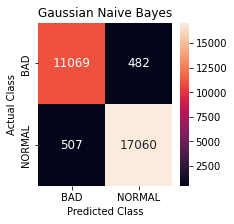

In [48]:
df = pd.read_pickle('gnb_dataset.pkl')

x_train, y_train, x_test, y_test = train_test(df=df, stratify_col='target', split=0.20)

gaussian_classifier = GNB()
gaussian_classifier.fit(x_train, y_train)
preds = []
for test in x_test.values:
    preds.append(gaussian_classifier.predict(test))
y_pred = np.array(preds)

acc = accuracy(y_test.values, y_pred)
print(f"Accuracy: {acc}%")

fp = confusion_matrix(y_test.values, y_pred, "Gaussian Naive Bayes")

# Results
results['Gaussian Naive Bayes'] = [acc, fp]

### Decision Tree

Accuracy: 99.65%


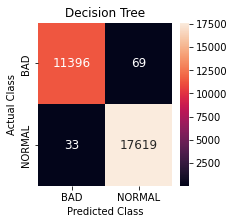

In [49]:
df = pd.read_pickle('dt_dataset.pkl')
df = df.sample(frac=1).reset_index(drop=True)

# As training on large dataset takes time, thus reducing the training set 
training_data = df.iloc[:10000, :].values.tolist()
testing_data = df.iloc[int(np.ceil(.80 * df.shape[0])):, :].values.tolist()

my_tree = build_tree(training_data)

actual, predicted = [], []
for row in testing_data:
    actual.append(row[-1])
    predicted.append(sorted(classify(row, my_tree).items(), key = lambda x: x[1], reverse = True)[0][0])

acc = accuracy(np.array(actual), np.array(predicted))
print(f"Accuracy: {acc}%")

fp = confusion_matrix(np.array(actual), np.array(predicted), "Decision Tree")

# Results
results['Decision Tree'] = [acc, fp]

### XGBoost

(29118,) (116468,)
Accuracy: 99.68%


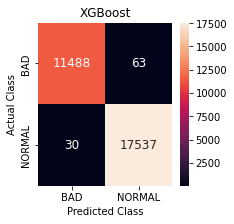

In [50]:
df = pd.read_pickle('xgb_dataset.pkl')
x_train, y_train, x_test, y_test = train_test(df=df, stratify_col='target', split=0.20)

model = XGBClassifier()
model.fit(x_train, y_train, eval_metric='rmse')
y_pred = model.predict(x_test)

acc = accuracy(y_test.values, y_pred)
print(f"Accuracy: {acc}%")

fp = confusion_matrix(y_test.values, y_pred, "XGBoost")

# Results
results['XGBoost'] = [acc, fp]

### Max-Voting Ensemble Technique

Accuracy: 99.88%


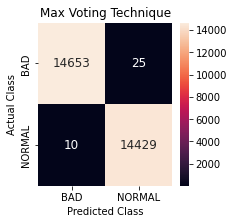

In [51]:
# Vote from GNB
df = pd.read_pickle('gnb_dataset.pkl')
preds = []
test_set = df.iloc[int(np.ceil(.80 * df.shape[0])):, :-1]
for test in test_set.values:
    preds.append(gaussian_classifier.predict(test))
gnb_preds = np.array(preds)

# Vote from DT
df = pd.read_pickle('dt_dataset.pkl')
test_set = df.iloc[int(np.ceil(.80 * df.shape[0])):, :].values.tolist()
predicted = []
for row in test_set:
    predicted.append(sorted(classify(row, my_tree).items(), key = lambda x: x[1], reverse = True)[0][0])
dt_preds = np.array(predicted)
    
# Vote from XGBoost
df = pd.read_pickle('xgb_dataset.pkl')
test_set = df.iloc[int(np.ceil(.80 * df.shape[0])):, :-1]
xgb_preds = model.predict(test_set)

# Max-voting ensemble technique
y_test_pred_maxvote = []
for tup in list(zip(gnb_preds, dt_preds, xgb_preds)):
    y_test_pred_maxvote.append(np.bincount(tup).argmax())
max_vote_preds = np.array(y_test_pred_maxvote)

# Evaluation    
y_test = df.iloc[int(np.ceil(.80 * df.shape[0])):, -1]

acc = accuracy(y_test.values, max_vote_preds)
print(f"Accuracy: {acc}%")

fp = confusion_matrix(y_test.values, max_vote_preds, "Max Voting Technique")

# Results
results['Max Voting Technique'] = [acc, fp]

In [52]:
# Results
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Technique", "Accuracy", "False Positives"]
x.add_row(['Gaussian Naive Bayes'] + results['Gaussian Naive Bayes'])
x.add_row(['Decision Tree']  + results['Decision Tree'])
x.add_row(['XGBoost'] + results['XGBoost'])
x.add_row(['Max Voting Technique'] + results['Max Voting Technique'])
print(x)

+----------------------+----------+-----------------+
|      Technique       | Accuracy | False Positives |
+----------------------+----------+-----------------+
| Gaussian Naive Bayes |   96.6   |       482       |
|    Decision Tree     |  99.65   |        69       |
|       XGBoost        |  99.68   |        63       |
| Max Voting Technique |  99.88   |        25       |
+----------------------+----------+-----------------+


# MODEL-2

In [53]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

x_train, y_train, x_test, y_test = train_test(df=df, stratify_col='target', split=0.20)

(29118,) (116468,)


In [54]:
x_train = np.asarray(x_train)
x_train

array([[ 1.99141285e+00, -6.23400244e-01, -4.61350772e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.97638866e+00, -6.47418536e-01, -5.57587653e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.97431555e+00, -6.61887990e-01, -5.85593220e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 7.14360557e-01, -1.16879882e-01, -1.42127264e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.24156200e-01, -1.17278125e-01, -1.53544781e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.24052264e-01, -1.18359708e-01, -2.09322731e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [55]:
y_train = np.asarray(y_train)
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [56]:
x_test = np.asarray(x_test)
x_test

array([[ 2.74902574e+00, -8.56571662e-01, -1.11065783e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.85438383e+00, -4.14637911e-01, -1.64232727e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.14102350e+00, -8.87127376e-01, -1.03579438e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.48206353e+00,  6.19605082e+00, -3.04543031e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.91244201e+00, -1.03670308e+00, -3.36139393e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.61969747e+00,  6.21472028e+00, -3.73827398e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [57]:
y_test = np.asarray(y_test)
y_test

array([1, 1, 1, ..., 0, 0, 0])

# **Build Classification models**

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

**K nearest neighbors**

Model performance for Training set
- Accuracy: 0.9991757392588522
- MCC: 0.9982780063596725
- F1 score: 0.9991757453669852
----------------------------------
Model performance for Test set
- Accuracy: 0.9986949653135517
- MCC: 0.9972735473640854
- F1 score: 0.9986949653135517


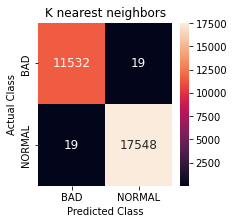

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) # Define classifier
knn.fit(x_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "K nearest neighbors")

**Support vector machine (Radial basis function kernel)**

Model performance for Training set
- Accuracy: 0.9995706975306522
- MCC: 0.9991031059330951
- F1 score: 0.999570683200456
----------------------------------
Model performance for Test set
- Accuracy: 0.9966687272477506
- MCC: 0.9930521940660939
- F1 score: 0.9966664432639952


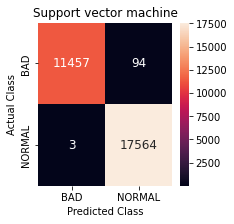

In [60]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=2, C=1)
svm_rbf.fit(x_train, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(x_train)
y_test_pred = svm_rbf.predict(x_test)

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "Support vector machine")

**Decision tree**

Model performance for Training set
- Accuracy: 0.9913280901191743
- MCC: 0.9819161161778884
- F1 score: 0.9913162106811411
----------------------------------
Model performance for Test set
- Accuracy: 0.990761728140669
- MCC: 0.9807295527494517
- F1 score: 0.9907490726493235


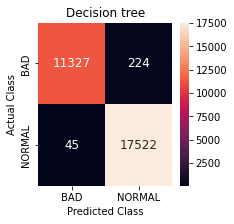

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) # Define classifier
dt.fit(x_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "Decision tree")

**Random forest**

Model performance for Training set
- Accuracy: 0.9999227255555174
- MCC: 0.9998385637047219
- F1 score: 0.9999227259850151
----------------------------------
Model performance for Test set
- Accuracy: 0.9985232502232296
- MCC: 0.9969147604271503
- F1 score: 0.9985232392756984


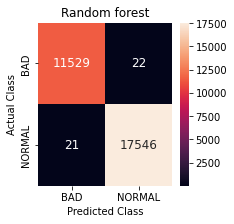

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10) # Define classifier
rf.fit(x_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "Random forest")

**Neural network**

Model performance for Training set
- Accuracy: 0.9866229350551224
- MCC: 0.9721384343888166
- F1 score: 0.9865933200674359
----------------------------------
Model performance for Test set
- Accuracy: 0.9863314788103579
- MCC: 0.9715246769922284
- F1 score: 0.9863014417002924


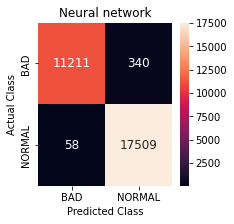

In [63]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(x_train, y_train)

# Make predictions
y_train_pred = mlp.predict(x_train)
y_test_pred = mlp.predict(x_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "Neural network")

**XGboost**

In [64]:
from xgboost import XGBClassifier

In [65]:
xgbc=XGBClassifier()


In [66]:
print(xgbc)

XGBClassifier()


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [67]:
xgbc.fit(x_train, y_train, eval_metric='rmse')
#xgb_model.fit(X_train, y_train, sample_weight=classes_weights)

XGBClassifier()

Model performance for Training set
- Accuracy: 0.9970463990108871
- MCC: 0.9938288671966665
- F1 score: 0.9970457829411681
----------------------------------
Model performance for Test set
- Accuracy: 0.9969091283742015
- MCC: 0.9935417352269086
- F1 score: 0.9969087607634012


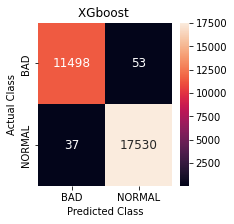

In [68]:
# Make predictions
y_train_pred = xgbc.predict(x_train)
y_test_pred = xgbc.predict(x_test)

# Training set performance
xgbc_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
xgbc_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
xgbc_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
xgbc_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
xgbc_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
xgbc_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % xgbc_train_accuracy)
print('- MCC: %s' % xgbc_train_mcc)
print('- F1 score: %s' % xgbc_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % xgbc_test_accuracy)
print('- MCC: %s' % xgbc_test_mcc)
print('- F1 score: %s' % xgbc_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "XGboost ")

**Gaussian Naive Bayes**

In [69]:
from sklearn.naive_bayes import GaussianNB

gnbc = GaussianNB()


In [70]:
print(gnbc)

GaussianNB()


In [71]:
gnbc.fit(x_train, y_train)

GaussianNB()

Model performance for Training set
- Accuracy: 0.639944018957997
- MCC: 0.23196727075653065
- F1 score: 0.5348611879353562
----------------------------------
Model performance for Test set
- Accuracy: 0.6387801359983515
- MCC: 0.22755575448186915
- F1 score: 0.5326998263321133


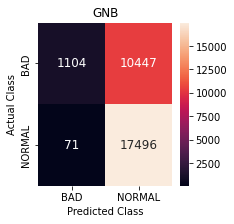

In [72]:
# Make predictions
y_train_pred = gnbc.predict(x_train)
y_test_pred = gnbc.predict(x_test)

# Training set performance
gnbc_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
gnbc_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
gnbc_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
gnbc_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
gnbc_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
gnbc_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % gnbc_train_accuracy)
print('- MCC: %s' % gnbc_train_mcc)
print('- F1 score: %s' % gnbc_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % gnbc_test_accuracy)
print('- MCC: %s' % gnbc_test_mcc)
print('- F1 score: %s' % gnbc_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "GNB")

**AdaBoost**

In [1]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Import Support Vector Classifier
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')

In [2]:
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

In [3]:
print(abc)

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True),
                   learning_rate=1)


In [4]:
abc.fit(x_train, y_train)

NameError: ignored

In [ ]:
# Make predictions
y_train_pred = abc.predict(x_train)
y_test_pred = abc.predict(x_test)

# Training set performance
abc_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
abc_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
abc_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
abc_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
abc_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
abc_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % abc_train_accuracy)
print('- MCC: %s' % abc_train_mcc)
print('- F1 score: %s' % abc_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % abc_test_accuracy)
print('- MCC: %s' % abc_test_mcc)
print('- F1 score: %s' % abc_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "AdaBoost")

# **Build Stacked model**

In [ ]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    #('svm_rbf',svm_rbf),
    #('dt',dt),
    ('rf',rf),
    #('mlp',mlp), 
    ('xgb',xgbc),
    #('abc',abc),
    #('gnb',gnbc),


                
                    ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(x_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(x_train)
y_test_pred = stack_model.predict(x_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "Stacked Model")

**Build Hard Voting Model**

In [ ]:
# Define estimators
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    #('svm_rbf',svm_rbf),
    #('dt',dt),
    ('rf',rf),
    #('mlp',mlp)
    ('xgb',xgbc),
    #('abc',abc),
    #('gnb',gnbc),
    
                ]

# Build hard voting model
voting_model = VotingClassifier(estimators=estimator_list, voting='hard')

# Train voting model
voting_model.fit(x_train, y_train)

# Make predictions
voting_train_start = datetime.now()
y_train_pred = voting_model.predict(x_train)
voting_train_timing = datetime.now()-voting_train_start

print('Total voting training time taken:',voting_train_timing)

voting_test_start = datetime.now()
y_test_pred = voting_model.predict(x_test)
voting_test_timing = datetime.now()-voting_test_start

print('Total voting test time taken:',voting_test_timing)



# Training set model performance
voting_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
voting_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
voting_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
voting_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
voting_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
voting_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % voting_model_train_accuracy)
print('- MCC: %s' % voting_model_train_mcc)
print('- F1 score: %s' % voting_model_train_f1)
print('- Total voting training time:', voting_train_timing )
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % voting_model_test_accuracy)
print('- MCC: %s' % voting_model_test_mcc)
print('- F1 score: %s' % voting_model_test_f1)
print('- Total voting test time:', voting_test_timing )


fp = confusion_matrix(y_test, y_test_pred, "Hard Voting Model")

**Build Soft Voting Model**

# **Eğitim Sonuçları**

In [ ]:
acc_train_list = {'knn':knn_train_accuracy,
'svm_rbf': svm_rbf_train_accuracy,
'dt': dt_train_accuracy,
'rf': rf_train_accuracy,
'mlp': mlp_train_accuracy,
'xgb': xgbc_train_accuracy,
'gnb': gnbc_train_accuracy,
'abc': abc_train_accuracy,
'stack': stack_model_train_accuracy,
'hard voting': voting_model_train_accuracy,
#'soft voting': soft_voting_model_train_accuracy
                        }

mcc_train_list = {'knn':knn_train_mcc,
'svm_rbf': svm_rbf_train_mcc,
'dt': dt_train_mcc,
'rf': rf_train_mcc,
'mlp': mlp_train_mcc,
'xgb': xgbc_train_mcc,
'gnb': gnbc_train_mcc,
'abc': abc_train_mcc,
'stack': stack_model_train_mcc,
'hard voting': voting_model_train_mcc,
#'soft voting': soft_voting_model_train_mcc
                 }



f1_train_list = {'knn':knn_train_f1,
'svm_rbf': svm_rbf_train_f1,
'dt': dt_train_f1,
'rf': rf_train_f1,
'mlp': mlp_train_f1,
'xgb': xgbc_train_f1,
'gnb': gnbc_train_f1,
'abc': abc_train_f1,             
'stack': stack_model_train_f1,
'hard voting': voting_model_train_f1,
#'soft voting': soft_voting_model_train_f1
                }




In [ ]:
acc_train_list

In [ ]:
mcc_train_list

In [ ]:
f1_train_list

In [ ]:
import pandas as pd

acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

In [ ]:
df.to_csv('Egitim_Sonuc.csv')

# **Test Sonuçları**

In [ ]:
acc_test_list = {'knn':knn_test_accuracy,
'svm_rbf': svm_rbf_test_accuracy,
'dt': dt_test_accuracy,
'rf': rf_test_accuracy,
'mlp': mlp_test_accuracy,
'xgb': xgbc_test_accuracy,
'gnb': gnbc_test_accuracy,
'abc': abc_test_accuracy,
'stack': stack_model_test_accuracy,
'hard voting': voting_model_test_accuracy,
#'soft voting': soft_voting_model_test_accuracy
                }

mcc_test_list = {'knn':knn_test_mcc,
'svm_rbf': svm_rbf_test_mcc,
'dt': dt_test_mcc,
'rf': rf_test_mcc,
'mlp': mlp_test_mcc,
'xgb': xgbc_test_mcc,
'gnb': gnbc_test_mcc,
'abc': abc_test_mcc,                 
'stack': stack_model_test_mcc,
'hard voting': voting_model_test_mcc,
#'soft voting': soft_voting_model_test_mcc
                }



f1_test_list = {'knn':knn_test_f1,
'svm_rbf': svm_rbf_test_f1,
'dt': dt_test_f1,
'rf': rf_test_f1,
'mlp': mlp_test_f1,
'xgb': xgbc_test_f1,
'gnb': gnbc_test_f1,
'abc': abc_test_f1,                 
'stack': stack_model_test_f1,
'hard voting': voting_model_test_f1,
#'soft voting': soft_voting_model_test_f1
               }


In [ ]:
acc_test_list

In [ ]:
mcc_test_list

In [ ]:
f1_test_list

In [ ]:
import pandas as pd

acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_test_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

In [ ]:
df.to_csv('Test_Sonuc.csv')